In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np
import papermill as pm

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
Nsim = 15
FirstStim = 9
LastStim = 20.0

In [3]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [4]:
print Nsim
print FirstStim
print LastStim

15
9
20.0


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345586 synapses were built
All the 0 synaptic noises were built


In [6]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

59.2047071457 seconds
[ 0.]
[ 0.]
58.6869199276 seconds
[ 0.]
[ 0.]
61.5587000847 seconds
[ 0.]
[ 0.]
59.170675993 seconds
[ 0.]
[ 0.0401045]
62.9575738907 seconds
[ 0.]
[ 0.2557552]
61.6407871246 seconds
[ 0.35616338]
[ 0.52119007]
63.435931921 seconds
[ 0.61578944]
[ 0.90111991]
65.5085930824 seconds
[ 0.87516057]
[ 0.78693636]
66.5921700001 seconds
[ 1.13901495]
[ 0.53300451]
65.935696125 seconds
[ 1.34221631]
[ 0.32496021]
66.6116719246 seconds
[ 1.46034629]
[ 0.20646399]
68.4847500324 seconds
[ 1.55697463]
[ 0.06202971]
68.1223289967 seconds
[ 1.57989347]
[ 0.01026499]
71.9342980385 seconds
[ 1.60283899]
[  1.42234837e-07]
68.7622270584 seconds
[ 1.59936868]
[  1.30118939e-07]


<IPython.core.display.Javascript object>


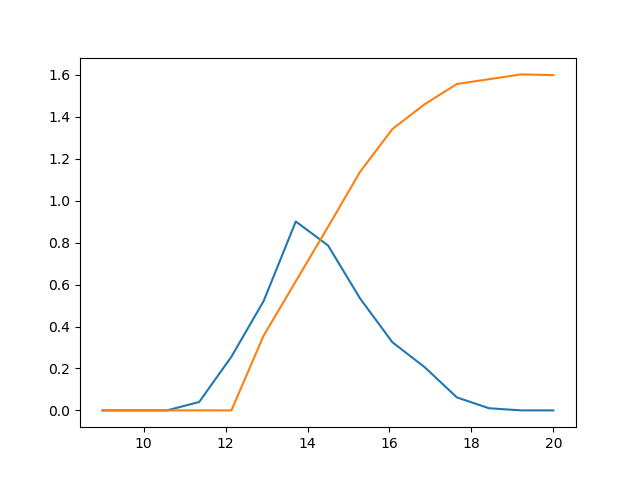

<IPython.core.display.Javascript object>


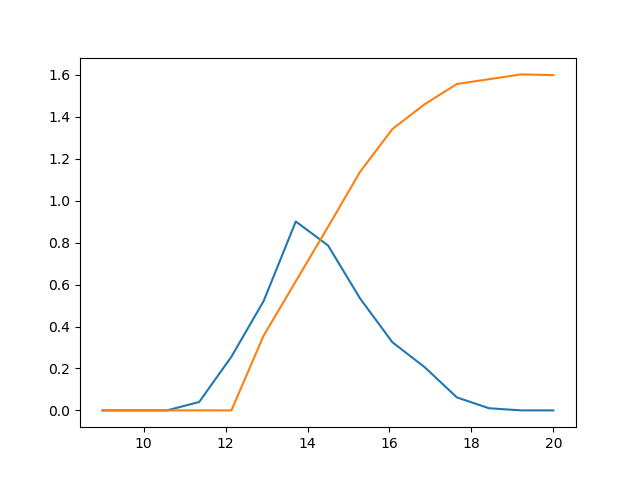

In [7]:
f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)
pm.display('mHcurves', f1)

In [8]:
np.max(Hp)/np.max(Mp)

0.56220239059767041

In [9]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.35616338],
       [ 0.61578944],
       [ 0.87516057],
       [ 1.13901495],
       [ 1.34221631],
       [ 1.46034629],
       [ 1.55697463],
       [ 1.57989347],
       [ 1.60283899],
       [ 1.59936868]])

<IPython.core.display.Javascript object>


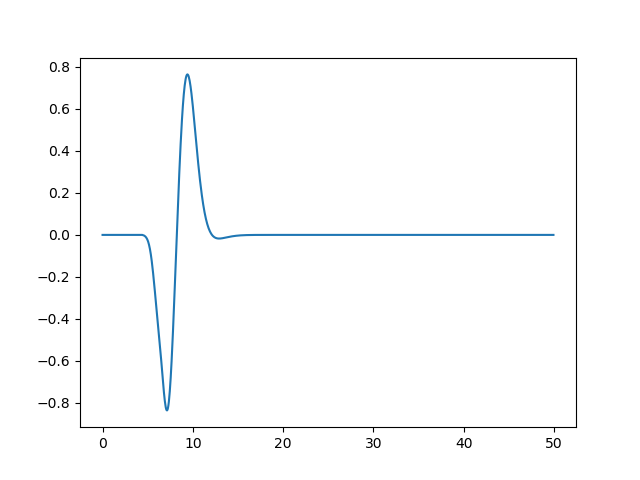

<IPython.core.display.Javascript object>


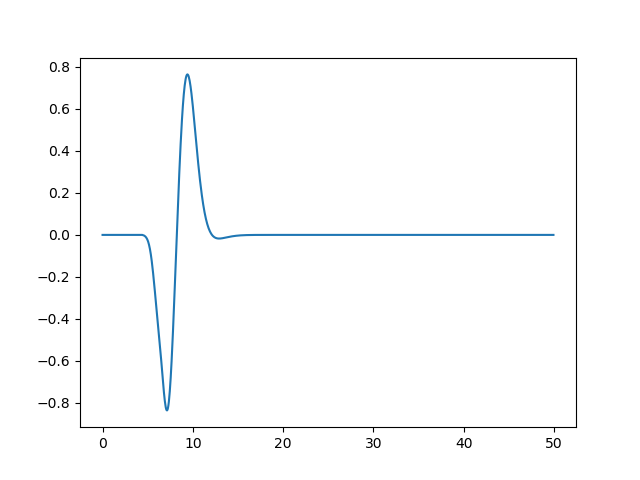

In [10]:
f2 = plt.figure()
plt.plot(t, emg[:,14])
pm.display('mhsignal', f2)

In [11]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


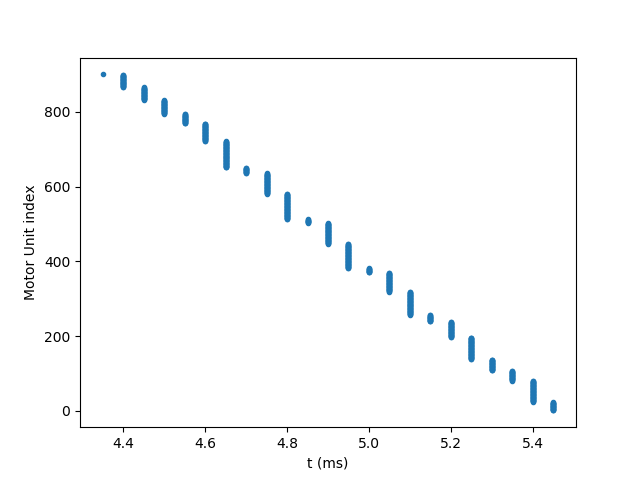

<IPython.core.display.Javascript object>


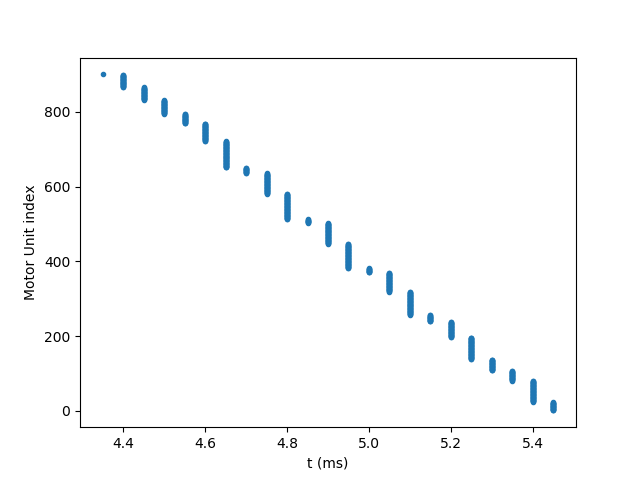

In [12]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
    sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
pm.display('MNspikes', f3)

In [13]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)